In [73]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [74]:
data_train = pd.read_csv('/content/Dataset/train.csv')

data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [75]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [76]:
X = data_train[['YearBuilt','GarageArea','PoolArea','1stFlrSF', '2ndFlrSF','BsmtFinSF1','GrLivArea','TotalBsmtSF']].values
Y = data_train[['SalePrice']].values

X.shape

(1460, 8)

In [77]:
X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y)


In [78]:
model = tf.keras.models.Sequential([
    Dense(8,activation="relu"),
    Dense(128,activation="elu"),
    Dense(64,activation="elu"),
    Dense(1,activation="linear")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = 'mae')

In [79]:
history = model.fit(X_train, Y_train,epochs=1000)


Epoch 1/1000
35/35 [==============================] - 1s 3ms/step - loss: 92846.9297
Epoch 2/1000
35/35 [==============================] - 0s 3ms/step - loss: 32808.9688
Epoch 3/1000
35/35 [==============================] - 0s 3ms/step - loss: 30033.8457
Epoch 4/1000
35/35 [==============================] - 0s 4ms/step - loss: 29328.5938
Epoch 5/1000
35/35 [==============================] - 0s 4ms/step - loss: 30001.1309
Epoch 6/1000
35/35 [==============================] - 0s 4ms/step - loss: 30360.9414
Epoch 7/1000
35/35 [==============================] - 0s 3ms/step - loss: 29499.3770
Epoch 8/1000
35/35 [==============================] - 0s 3ms/step - loss: 27935.6367
Epoch 9/1000
35/35 [==============================] - 0s 3ms/step - loss: 27343.1523
Epoch 10/1000
35/35 [==============================] - 0s 4ms/step - loss: 28034.2715
Epoch 11/1000
35/35 [==============================] - 0s 3ms/step - loss: 28216.0273
Epoch 12/1000
35/35 [==============================] - 0s 3ms/s

In [80]:
evaluate_test = model.evaluate(X_validation,Y_validation)
evaluate_test

12/12 [==============================] - 0s 2ms/step - loss: 26087.2461


26087.24609375

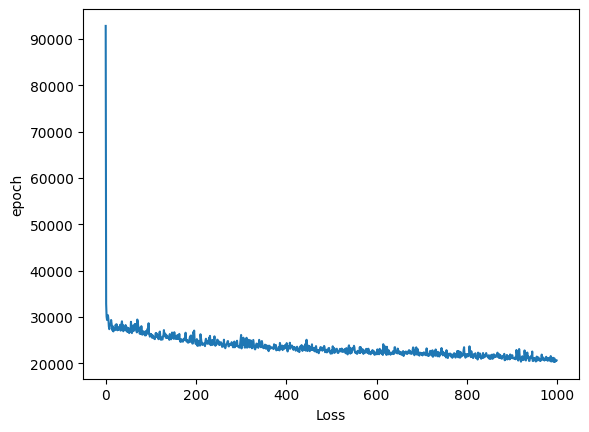

In [81]:
plt.plot(history.history['loss'])
plt.xlabel('Loss')
plt.ylabel('epoch')
plt.show()

In [72]:
model.save('model/house_price.h5')